In [10]:
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
SC = SpectralClustering(4)
gm = GaussianMixture(4)

In [58]:
inp_tr = np.load("../Data_and_Results/Inputs_YSO_Train.npy")[slice(0,20000)]
tar_tr = np.load("../Data_and_Results/Targets_YSO_Train.npy")[slice(0,20000)]

inp_tr.shape

(20000, 9)

In [27]:
SC.fit(inp_tr)


SpectralClustering(n_clusters=4)

(array([910.,   0.,   0.,   6.,   0.,   0.,   6.,   0.,   0.,  23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 [<matplotlib.patches.Polygon at 0x128fad630>])

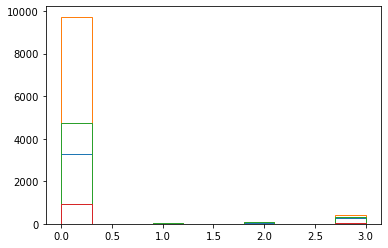

In [28]:
pred = SC.fit_predict(inp_tr)
# To analyze, find which of the four clusters has the greatest number of each class:
CI = np.where(tar_tr==0)[0]
CII = np.where(tar_tr==1)[0]
CFS = np.where(tar_tr==2)[0]
CIII = np.where(tar_tr==3)[0]

plt.hist(pred[CI],histtype='step',label='Class I')
plt.hist(pred[CII],histtype='step',label='Class II')
plt.hist(pred[CFS],histtype='step',label='Class FS')
plt.hist(pred[CIII],histtype='step',label='Class III')

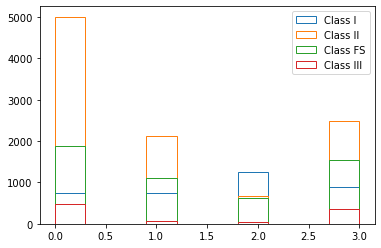

In [29]:
pred_gm = gm.fit_predict(inp_tr)

plt.hist(pred_gm[CI],histtype='step',label='Class I')
plt.hist(pred_gm[CII],histtype='step',label='Class II')
plt.hist(pred_gm[CFS],histtype='step',label='Class FS')
plt.hist(pred_gm[CIII],histtype='step',label='Class III')
plt.legend()

In [30]:
from sklearn.cluster import k_means

cen, labs, inert  = k_means(inp_tr,4)

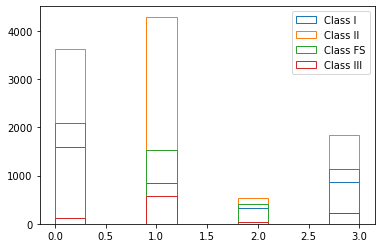

In [31]:

plt.hist(labs[CI],histtype='step',label='Class I')
plt.hist(labs[CII],histtype='step',label='Class II')
plt.hist(labs[CFS],histtype='step',label='Class FS')
plt.hist(labs[CIII],histtype='step',label='Class III')
plt.legend()

In [32]:
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans, SpectralBiclustering

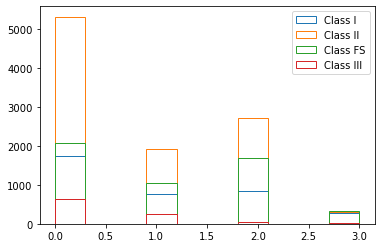

In [33]:
ag = AgglomerativeClustering(4)

pred_ag = ag.fit_predict(inp_tr)

plt.hist(pred_ag[CI],histtype='step',label='Class I')
plt.hist(pred_ag[CII],histtype='step',label='Class II')
plt.hist(pred_ag[CFS],histtype='step',label='Class FS')
plt.hist(pred_ag[CIII],histtype='step',label='Class III')
plt.legend()

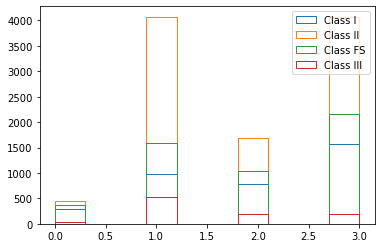

In [34]:
minikm = MiniBatchKMeans(4)

pred_mk = minikm.fit_predict(inp_tr)

plt.hist(pred_mk[CI],histtype='step',label='Class I')
plt.hist(pred_mk[CII],histtype='step',label='Class II')
plt.hist(pred_mk[CFS],histtype='step',label='Class FS')
plt.hist(pred_mk[CIII],histtype='step',label='Class III')
plt.legend()

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


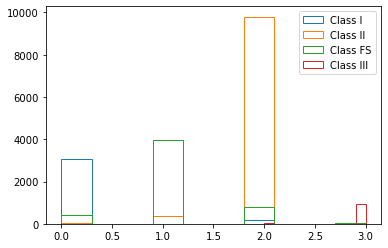

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(inp_tr,tar_tr)
pred_gb = gb.predict(inp_tr)

plt.hist(pred_gb[CI],histtype='step',label='Class I')
plt.hist(pred_gb[CII],histtype='step',label='Class II')
plt.hist(pred_gb[CFS],histtype='step',label='Class FS')
plt.hist(pred_gb[CIII],histtype='step',label='Class III')
plt.legend()

In [60]:
from sklearn.metrics import classification_report

print(classification_report(tar_tr,pred_gb))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      3630
         1.0       0.84      0.77      0.80      5144
         2.0       0.91      0.95      0.93     10281
         3.0       0.93      0.98      0.96       945

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



Text(0.5, 1.0, 'Gradient Boosting Labels')

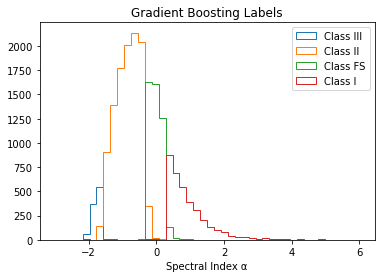

In [63]:
bins = np.linspace(-3, 6, 45)

aIII = np.where(pred_gb==3.)
plt.hist(inp_tr[aIII].transpose()[8],bins,histtype='step',label='Class III')
aII = np.where(pred_gb==2.)
plt.hist(inp_tr[aII].transpose()[8],bins,histtype='step',label='Class II')
aFS = np.where(pred_gb==1.)
plt.hist(inp_tr[aFS].transpose()[8],bins,histtype='step',label='Class FS')
aI = np.where(pred_gb==0.)
plt.hist(inp_tr[aI].transpose()[8],bins,histtype='step',label='Class I')

plt.legend()
plt.xlabel('Spectral Index α')
plt.title('Gradient Boosting Labels')